1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Probability (Poisson): 	 0.08444930803583883
p-value from Z >= 3 :	 0.13498980316301035 

Number (15) is not significantly different from historical stats.



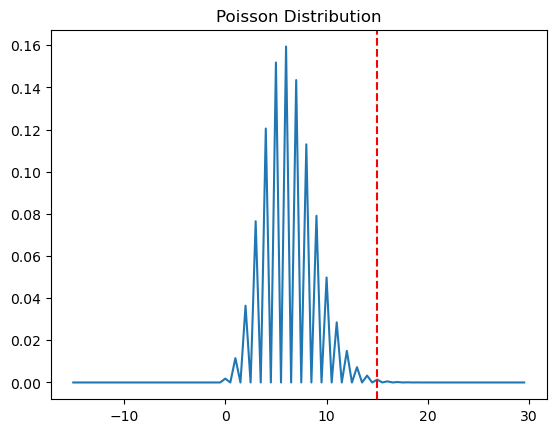

In [48]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import math
import statistics
from scipy.optimize import curve_fit

mu = 6.3
k = 15
probability = 1 - stats.poisson.cdf(15, 6.3)

Z = 3
pvalue = 1 - stats.norm.cdf(Z)

print("Probability (Poisson): \t", probability * 100)
print("p-value from Z >= 3 :\t", pvalue * 100, "\n")

if probability > pvalue:
    print("Number (15) is significantly different from historical stats.")
else:
    print("Number (15) is not significantly different from historical stats.\n")

xs = np.arange(-15, 30, 0.5)
ts = stats.poisson.pmf(xs, mu)
plt.plot(xs, ts)
plt.title("Poisson Distribution")
plt.axvline(k, linestyle='--', color='red')
plt.show()


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T-value:  3.786997938137629
p-value:  0.0013499418313276546
There is a statistically significant difference between blood pressures.



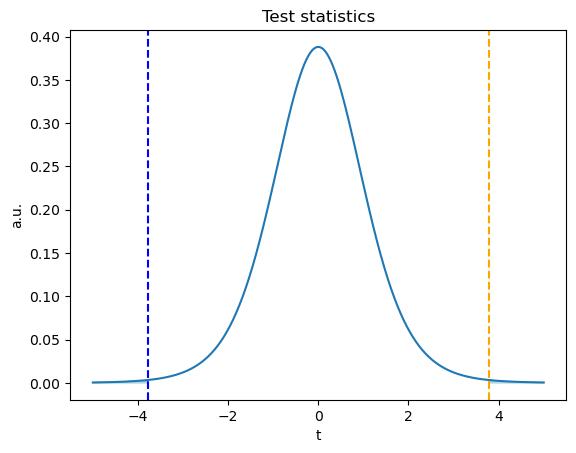

In [49]:

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(post)
mean_pre = np.mean(pre)
mean_post = np.mean(post)
var_pre = np.var(pre, ddof=1)
var_post = np.var(post, ddof=1)
sigma = np.sqrt((var_pre + var_post) / 2)

t = (mean_post - mean_pre) / (sigma * np.sqrt(2/n))

print("T-value: ", t)
p_value = stats.t.cdf(-t, 2*(n - 1)) + (1.0 - stats.t.cdf(t, 2*(n - 1)))

print("p-value: ", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference between blood pressures.\n")
else:
    print("There is no statistically significant difference between blood pressures.\n")

xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(t), color='lightblue')
plt.axvline(t, linestyle='--', color='orange')
plt.axvline(-t, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Max curve params:  [23.09206731  6.73581537 -2.29443052 15.77935195]
Min curve params:  [ 52.64929229   7.16452595  -1.97590019 -61.32093705]


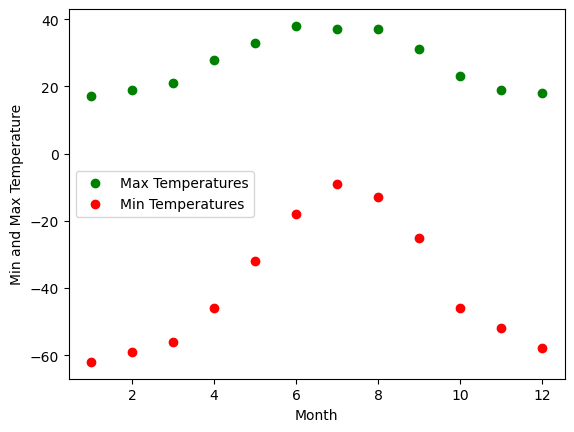

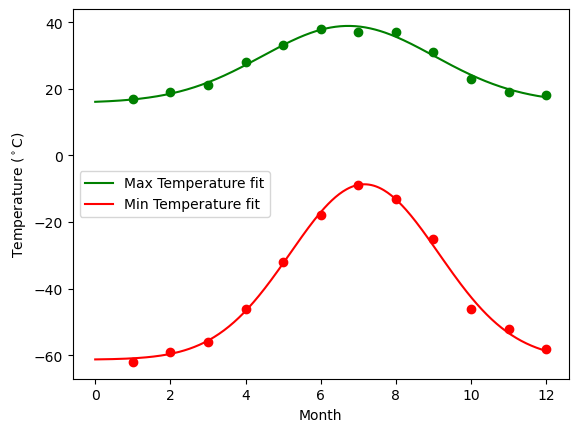

The outcomes are sensible as the Gaussian function was a suitable choice for fitting.

The time offset for Max curve(6.736) and Min curve(7.165) are not the same.



In [50]:

months = np.arange(1, 13)
mins = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
maxs = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])

plt.plot(months, maxs, 'go', label="Max Temperatures")
plt.plot(months, mins, 'ro', label="Min Temperatures")
plt.xlabel('Month')
plt.ylabel('Min and Max Temperature')
plt.legend()

# Define the function to fit: a * exp(-(x-b)**2 / (2*c**2)) + d
def func_predict(x, a, b, c, d):
    return a * np.exp(-(x - b)**2 / (2 * c**2)) + d

# Fit the function to the data
param_max, cov_max = optimize.curve_fit(func_predict, months, maxs)
param_min, cov_min = optimize.curve_fit(func_predict, months, mins)

print("Max curve params: ", param_max)
print("Min curve params: ", param_min)

# Generate x values for a smoother plot
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, maxs, 'go')
plt.plot(days, func_predict(days, *param_max), 'g-', label="Max Temperature fit")
plt.plot(months, mins, 'ro')
plt.plot(days, func_predict(days, *param_min), 'r-', label="Min Temperature fit")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

print("The outcomes are sensible as the Gaussian function was a suitable choice for fitting.\n")
print("The time offset for Max curve(%.3f)" % param_max[1], "and Min curve(%.3f)" % param_min[1], "are not the same.\n")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

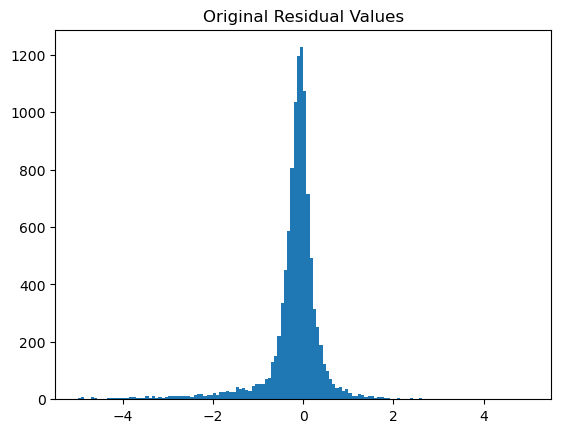

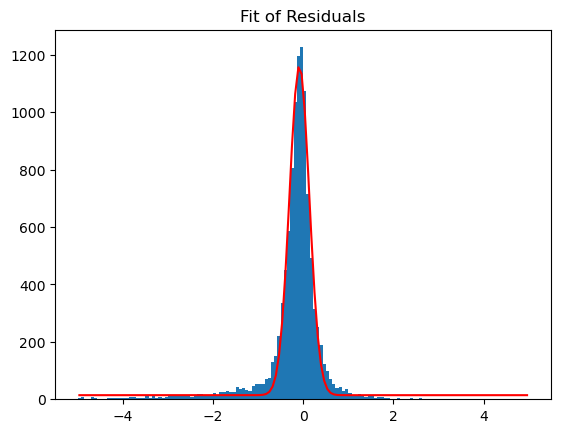

chi2 = 6089.259689261782
p-value = 0.0
The fit is considered unsatisfactory.


In [51]:

data = np.load('residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(data) 

#histogram of residuals with Poisson uncertainties
n, bins, _ = plt.hist(df["residuals"], bins=140, range=(-5, 5))
plt.title("Original Residual Values")
plt.show()

#bin centers
x = (bins[:-1] + bins[1:]) * 0.5

#Poisson uncertainties
sigma_values = np.sqrt(np.abs(n))

#define and fit a Gaussian function to the histogram
def gauss(x, ampl, mu, sigma, o):
    return ampl * np.exp(-(x - mu)**2 / (2 * sigma**2)) + o

mu = statistics.mean(df["residuals"])
sigma = statistics.stdev(df["residuals"])
popt, pcov = curve_fit(gauss, x, n, [max(df["residuals"]), mu, sigma, 0])

# Plot histogram and fitted Gaussian
plt.hist(df["residuals"], bins=140, range=(-5, 5))
plt.plot(x, gauss(x, *popt), color="red")
plt.title("Fit of Residuals")
plt.show()

# Calculate chi-squared and p-value
ndof = len(x) - 1
func_fit = gauss(x, *popt)
chi2 = np.sum(((n - func_fit)**2) / sigma**2)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

# Evaluate goodness-of-fit
if pvalue < 0.05:
    print("The fit is considered unsatisfactory.")
else:
    print("The fit is considered satisfactory.")


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

           years     temp
4748  2008.00274 -2.94444
4749  2008.00548 -2.66667
4750  2008.00821 -2.66667
4751  2008.01095 -2.00000
4752  2008.01369 -1.94444


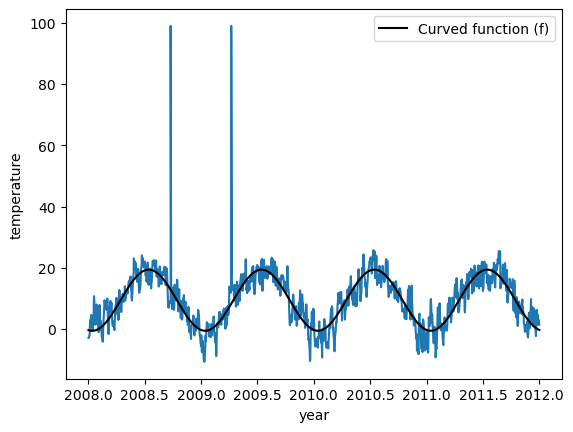

Best fit parameters for a, b and c respectively: 
 [-9.98813368 -0.2333476   9.38411487] 

Overal average temperature : 9.384097734976043
Highest Temperature:  19.372195565044393
Lowest Temperature:  -0.6037388707744356

The 'b' parameter represents a horizontal shift, known as a phase shift, that shifts the function’s graph along the x-axis.
In trigonometric functions, the horizontal shift is sometimes called a phase shift.
It does not change the behavior of the functions; it merely changes the time of the occurrence (when the x-axis represents time).
As shown in the diagram below, this shift changes the time when a temperature is experienced.



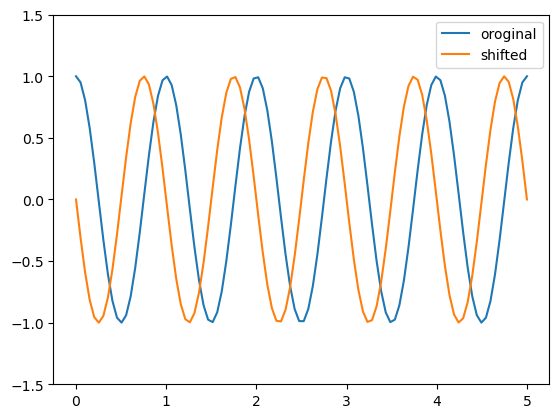

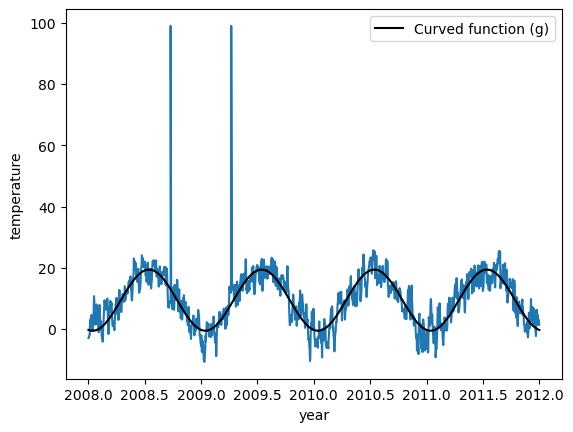

Best fit parameters for a, b, c and d respectively: 
 [-9.98218225  1.001444   -5.90396827  9.39812434] 

RSS f: 34359.85859996652
RSS g: 34352.79405384105

p-value: 0.584 , additional parameter necessary: NO


In [53]:
temps = pd.read_csv("munich_temperatures_average_with_bad_data.txt", sep = ' ', names = ['years', 'temp'], index_col = False)
temps = temps[(temps['years'] >= 2008) & (temps['years'] <= 2012)]
print(temps.head())

plt.plot(temps['years'], temps['temp'])
plt.xlabel('year')
plt.ylabel('temperature')

def f (t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c


f_params, f_cov = optimize.curve_fit(f, temps['years'], temps['temp'], p0=[1, 0, 1])
plt.plot(temps['years'], f(temps['years'], f_params[0], f_params[1], f_params[2]), label='Curved function (f)', color = 'black')
plt.legend()
plt.show()

print("Best fit parameters for a, b and c respectively: \n", f_params,"\n")
print("Overal average temperature :", np.mean(temps['temp']))
print("Highest Temperature: ", np.max(f(temps['years'], f_params[0], f_params[1], f_params[2])))
print("Lowest Temperature: ", np.min(f(temps['years'], f_params[0], f_params[1], f_params[2])))
print()
#meaning of the parameter 'b'
print("==============================================================")
print("The 'b' parameter represents a horizontal shift, known as a phase shift, that shifts the function’s graph along the x-axis.")
print("In trigonometric functions, the horizontal shift is sometimes called a phase shift.")
print("It does not change the behavior of the functions; it merely changes the time of the occurrence (when the x-axis represents time).")
print("As shown in the diagram below, this shift changes the time when a temperature is experienced.")
print("==============================================================\n")

t = np.linspace(0, 5, 100)
f1 = f(t, 1, 0, 0)
f2 = f(t, 1, np.pi/2, 0)
plt.plot(t, f1, label ='oroginal')
plt.plot(t, f2, label = 'shifted')
plt.ylim([-1.5, 1.5])
plt.legend()


def g (t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d

g_params, g_cov = optimize.curve_fit(g, temps['years'], temps['temp'], p0=[1, 1, 1, 1])
plt.figure()
plt.plot(temps['years'], temps['temp'])
plt.xlabel('year')
plt.ylabel('temperature')
plt.plot(temps['years'], g(temps['years'], g_params[0], g_params[1], g_params[2], g_params[3]), label='Curved function (g)', color = 'black')
plt.legend()
plt.show()

print("Best fit parameters for a, b, c and d respectively: \n", g_params,"\n")

f_rss = np.sum(np.square(temps['temp'] - (f(temps['years'],*f_params))))
g_rss =np.sum(np.square(temps['temp'] - (g(temps['years'],*g_params))))
print("RSS f: " + str(f_rss))
print("RSS g: " + str(g_rss))
    
ndof_f = 3 - 1
ndof_g = 4 - 1

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, alpha, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval


print()
pval_1_vs_2 = Ftest(f_rss, g_rss, ndof_f, ndof_g, len(temps), 0.05, verbose=True)


